In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rutaMar = "/content/drive/MyDrive/Datos/AlumnosPref.csv"


df_preferencias = pd.read_csv(rutaMar,delimiter=";")
df_preferencias.shape

<ipython-input-2-082a304c34c6>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_preferencias = pd.read_csv(rutaMar,delimiter=";")


(3042113, 33)

In [3]:
#Elegimos la region metropolitana
df_preferencias = df_preferencias[df_preferencias["COD_REG_RBD"] == "13"].reset_index(drop=True)
#Eliminamos columnas que no vamos a usar
df_preferencias = df_preferencias.drop(columns=["AGNO","COD_REG_RBD","COD_PRO_RBD","COD_DEPROV_RBD","NOM_DEPROV_RBD","LET_CUR"])

In [4]:
df_preferencias.shape


(912719, 27)

In [5]:
df_preferencias["AÑO_INGRESO_SEP"].unique()

array(['2021', '2022', '2019', ' ', '2023', '2020', '2015', '2016',
       '2017', '2012'], dtype=object)

In [6]:
#Reemplazamos las columnas de AÑO_INGRESO_SEP con valor ' ' a 1900 para transformar el dtype a int
df_preferencias["AÑO_INGRESO_SEP"].replace(' ', "1900", inplace=True)

In [7]:
df_preferencias["AÑO_INGRESO_SEP"].unique()

array(['2021', '2022', '2019', '1900', '2023', '2020', '2015', '2016',
       '2017', '2012'], dtype=object)

In [8]:
#AÑO_INGRESO_SEP es int pero cuando no se tiene convenio se deja vacio asi que es un object
df_preferencias= df_preferencias.astype({
    "GEN_ALU": int,
    "AÑO_INGRESO_SEP": int,
    "RBD": int,
    "DGV_RBD": int,
    "COD_COM_RBD":int,
    "COD_DEPE": int,
    "COD_DEPE2": int,
    "RURAL_RBD":int,
    "ESTADO_ESTAB":int,
    "CONVENIO_SEP":int,
    "EE_GRATUITO":int,
    "COD_ENSE":int,
    "COD_ENSE2":int,
    "COD_ENSE3":int,
    "COD_GRADO":int,
    "COD_GRADO2":int,
    "COD_JOR":int,
    "GRADO_SEP":int,
    "PRIORITARIO_ALU":int,
    "PREFERENTE_ALU":int,
    "BEN_SEP":int
})

In [9]:
df_preferencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912719 entries, 0 to 912718
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   MRUN               912719 non-null  int64 
 1   GEN_ALU            912719 non-null  int64 
 2   FEC_NAC_ALU        912719 non-null  int64 
 3   CRITERIO_SEP       912719 non-null  int64 
 4   RBD                912719 non-null  int64 
 5   DGV_RBD            912719 non-null  int64 
 6   NOM_RBD            912719 non-null  object
 7   COD_COM_RBD        912719 non-null  int64 
 8   NOM_COM_RBD        912719 non-null  object
 9   COD_DEPE           912719 non-null  int64 
 10  COD_DEPE2          912719 non-null  int64 
 11  RURAL_RBD          912719 non-null  int64 
 12  ESTADO_ESTAB       912719 non-null  int64 
 13  CONVENIO_SEP       912719 non-null  int64 
 14  AÑO_INGRESO_SEP    912719 non-null  int64 
 15  CLASIFICACION_SEP  767597 non-null  object
 16  EE_GRATUITO        9

In [10]:
df_preferencias.head()

,MRUN,GEN_ALU,FEC_NAC_ALU,CRITERIO_SEP,RBD,DGV_RBD,NOM_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPE,...,COD_ENSE,COD_ENSE2,COD_ENSE3,COD_GRADO,COD_GRADO2,COD_JOR,GRADO_SEP,PRIORITARIO_ALU,PREFERENTE_ALU,BEN_SEP
0,31,1,201312,1,10763,8,ESCUELA CRISTAL CHILE,13604,PADRE HURTADO,2,...,110,2,2,4,4,2,1,1,0,1
1,88,1,200708,2,10506,6,COLEGIO SENDA DEL SABER,13201,PUENTE ALTO,3,...,310,5,4,1,1,3,1,1,0,1
2,116,1,200910,2,8492,1,LICEO MANUEL BARROS BORGONO,13101,SANTIAGO,2,...,110,2,2,8,8,1,1,1,0,1
3,171,2,200603,0,9665,2,CENTRO EDUCACIONAL SANTA ROSA DEL SUR,13112,LA PINTANA,3,...,510,7,6,4,4,3,1,0,1,1
4,198,2,200907,0,8927,3,LICEO CARMELA CARVAJAL DE PRAT,13123,PROVIDENCIA,1,...,110,2,2,8,8,3,1,0,1,1


In [11]:
#Es normal
df_preferencias.isnull().sum()

,0
MRUN,0
GEN_ALU,0
FEC_NAC_ALU,0
CRITERIO_SEP,0
RBD,0
DGV_RBD,0
NOM_RBD,0
COD_COM_RBD,0
NOM_COM_RBD,0
COD_DEPE,0


In [13]:
df_preferencias.describe()

,MRUN,GEN_ALU,FEC_NAC_ALU,CRITERIO_SEP,RBD,DGV_RBD,COD_COM_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,...,COD_ENSE,COD_ENSE2,COD_ENSE3,COD_GRADO,COD_GRADO2,COD_JOR,GRADO_SEP,PRIORITARIO_ALU,PREFERENTE_ALU,BEN_SEP
count,9.127190e+05,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000,...,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000,912719.000000
mean,1.642117e+07,1.488447,201152.508078,1.113760,16045.709692,4.503392,13200.262661,2.729664,1.892083,0.031411,...,175.518514,2.991217,2.588322,4.645516,4.269661,2.456163,0.942631,0.664101,0.335899,0.775946
std,8.653754e+06,0.499871,409.129529,0.880039,7922.747186,2.874213,147.328292,1.019143,0.782834,0.174425,...,129.235116,1.718606,1.319768,4.400394,5.859763,0.850149,0.232547,0.472304,0.472304,0.416958
min,3.100000e+01,0.000000,200104.000000,0.000000,8485.000000,0.000000,13101.000000,1.000000,1.000000,0.000000,...,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.794934e+06,1.000000,200807.000000,0.000000,9779.000000,2.000000,13111.000000,2.000000,1.000000,0.000000,...,110.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000
50%,1.758772e+07,1.000000,201112.000000,1.000000,10638.000000,5.000000,13124.000000,3.000000,2.000000,0.000000,...,110.000000,2.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,2.542669e+07,2.000000,201505.000000,2.000000,25256.000000,7.000000,13201.000000,3.000000,2.000000,0.000000,...,310.000000,5.000000,4.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,2.743308e+07,2.000000,201908.000000,3.000000,42162.000000,9.000000,13605.000000,6.000000,5.000000,1.000000,...,910.000000,8.000000,7.000000,33.000000,99.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
print(df_preferencias[df_preferencias["PRIORITARIO_ALU"]==1].shape)
print(df_preferencias[df_preferencias["PREFERENTE_ALU"]==1].shape)
print(df_preferencias[df_preferencias["BEN_SEP"]==1].shape)

(606138, 27)
(306581, 27)
(708221, 27)


##Cantidad alumnos prioritarios por comuna

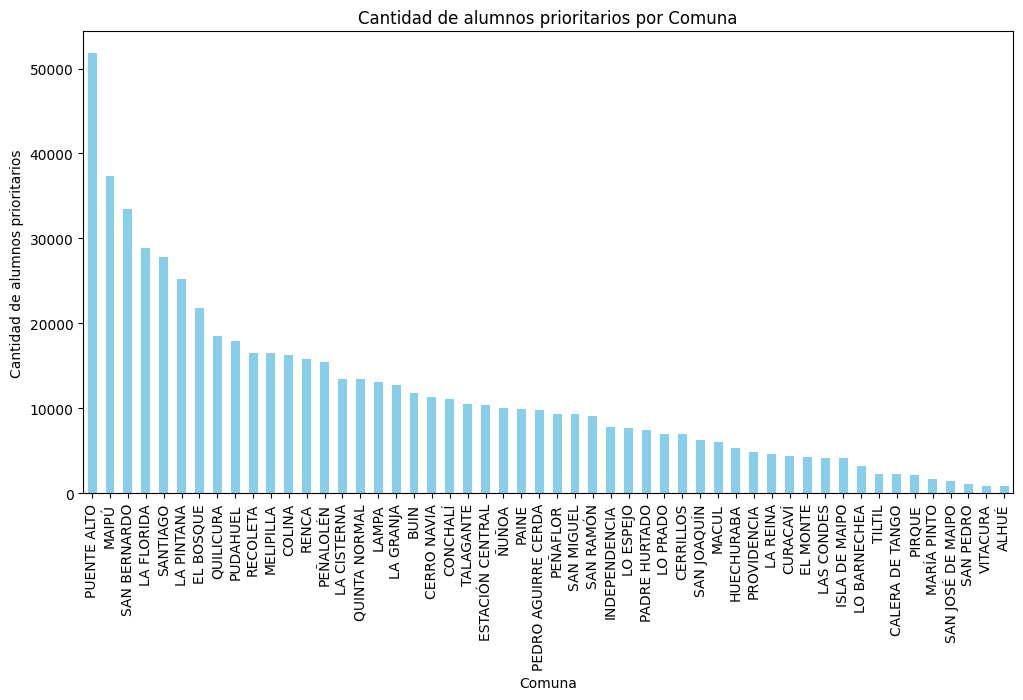

In [21]:
prioritarios_por_comuna = df_preferencias[df_preferencias["PRIORITARIO_ALU"]==1].groupby("NOM_COM_RBD").size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
prioritarios_por_comuna.plot(kind='bar', color='skyblue')

plt.title('Cantidad de alumnos prioritarios por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de alumnos prioritarios')

plt.show()

##Cantidad promedio de prioritarios por comuna

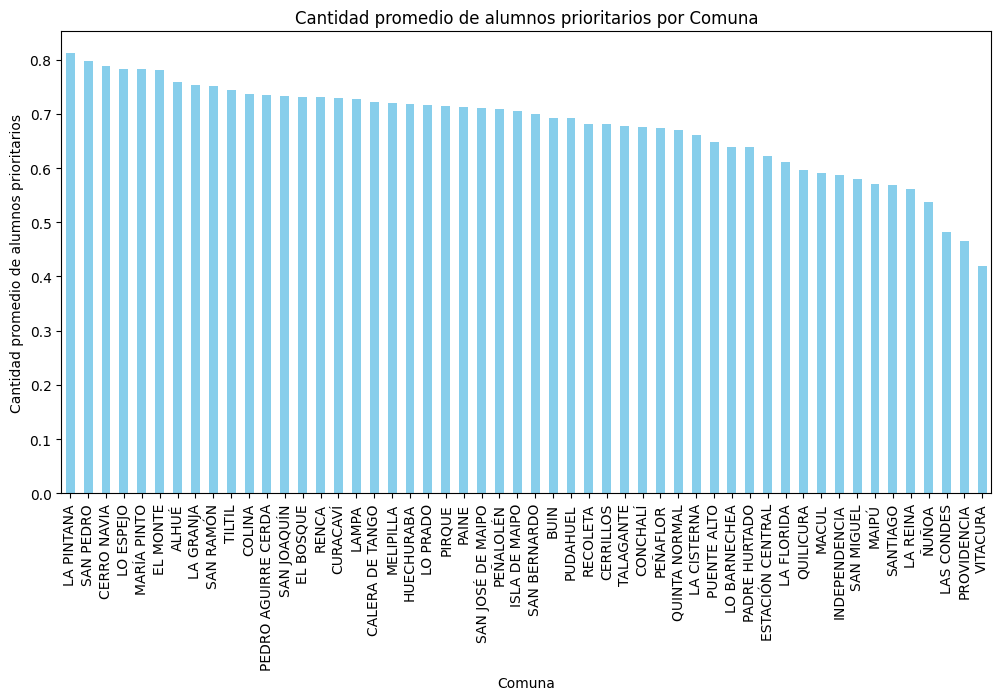

In [24]:
promedio_prioritarios_por_comuna = df_preferencias.groupby("NOM_COM_RBD")["PRIORITARIO_ALU"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
promedio_prioritarios_por_comuna.plot(kind='bar', color='skyblue')

plt.title('Cantidad promedio de alumnos prioritarios por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad promedio de alumnos prioritarios')

plt.show()

##Cantidad alumnos prioritarios por comuna

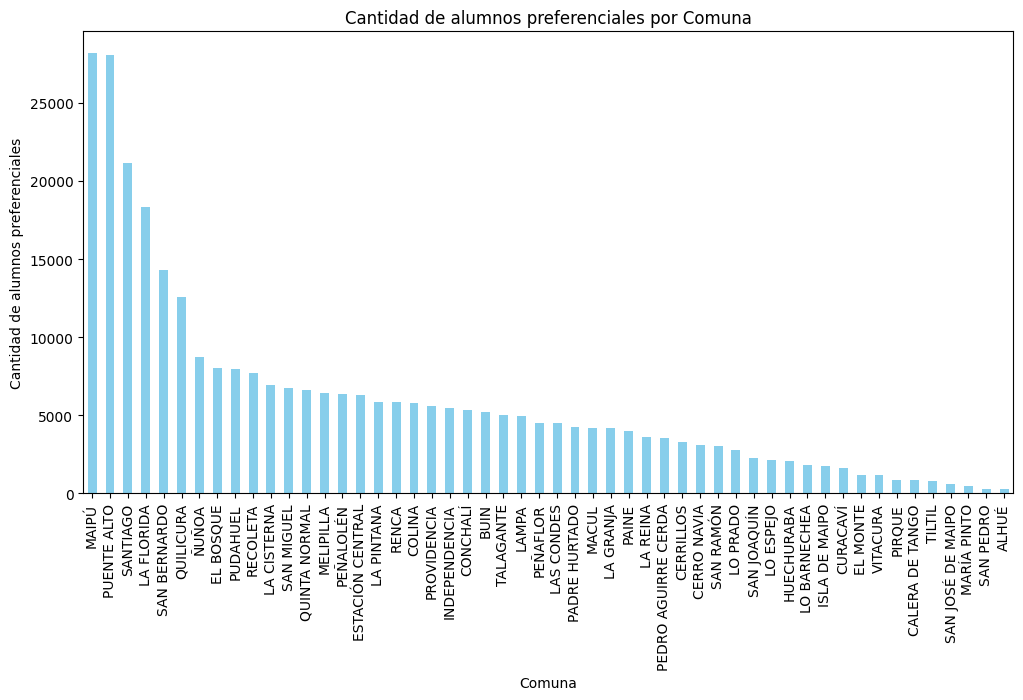

In [19]:
preferenciales_por_comuna = df_preferencias[df_preferencias["PREFERENTE_ALU"]==1].groupby("NOM_COM_RBD").size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
preferenciales_por_comuna.plot(kind='bar', color='skyblue')

plt.title('Cantidad de alumnos preferenciales por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de alumnos preferenciales')

plt.show()

##Cantidad promedio de alumnos preferentes por comuna

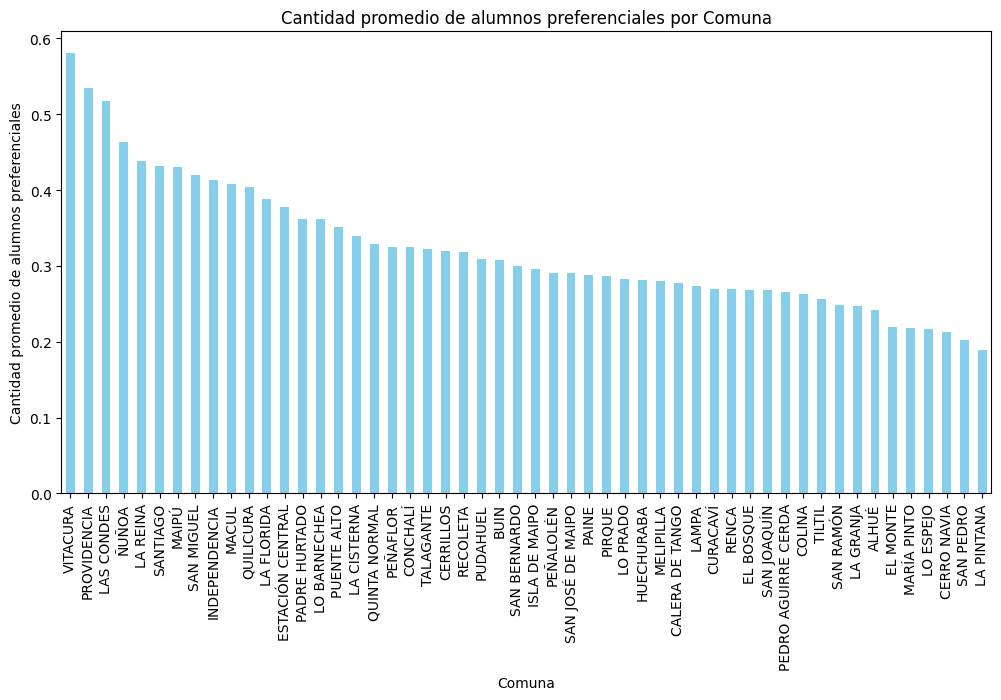

In [27]:
promedio_preferenciales_por_comuna = df_preferencias.groupby("NOM_COM_RBD")["PREFERENTE_ALU"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
promedio_preferenciales_por_comuna.plot(kind='bar', color='skyblue')

plt.title('Cantidad promedio de alumnos preferenciales por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad promedio de alumnos preferenciales')

plt.show()

##Cantidad promedio de alumnos beneficiarios SEP por comuna

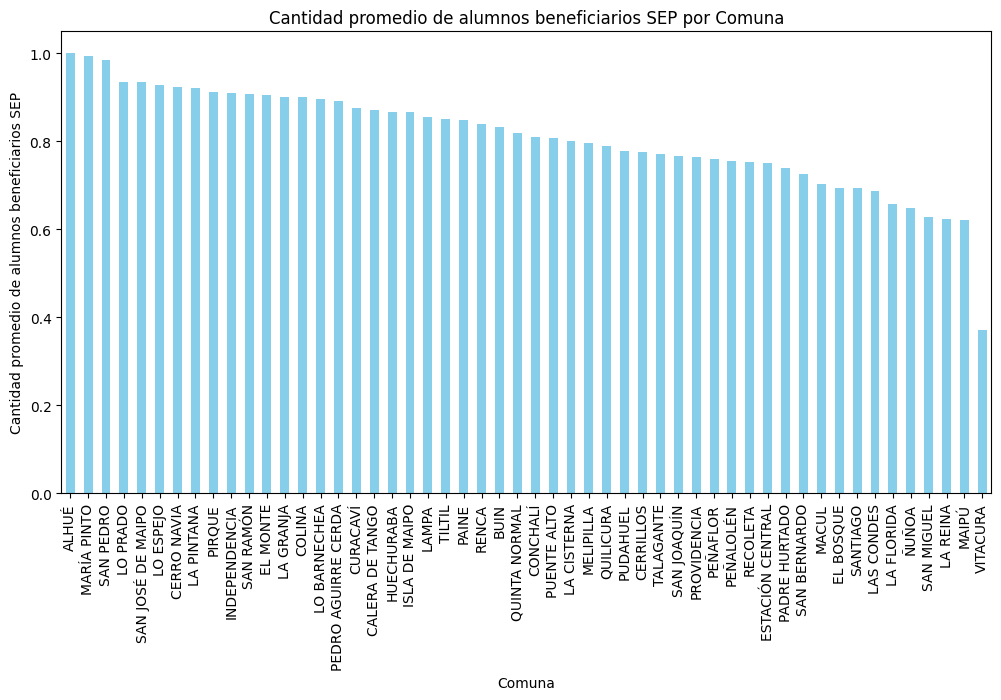

In [28]:
promedio_beneficiario_SEP_por_comuna = df_preferencias.groupby("NOM_COM_RBD")["BEN_SEP"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
promedio_beneficiario_SEP_por_comuna.plot(kind='bar', color='skyblue')

plt.title('Cantidad promedio de alumnos beneficiarios SEP por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad promedio de alumnos beneficiarios SEP')

plt.show()

##Cantidad de alumnos beneficiarios SEP por comuna


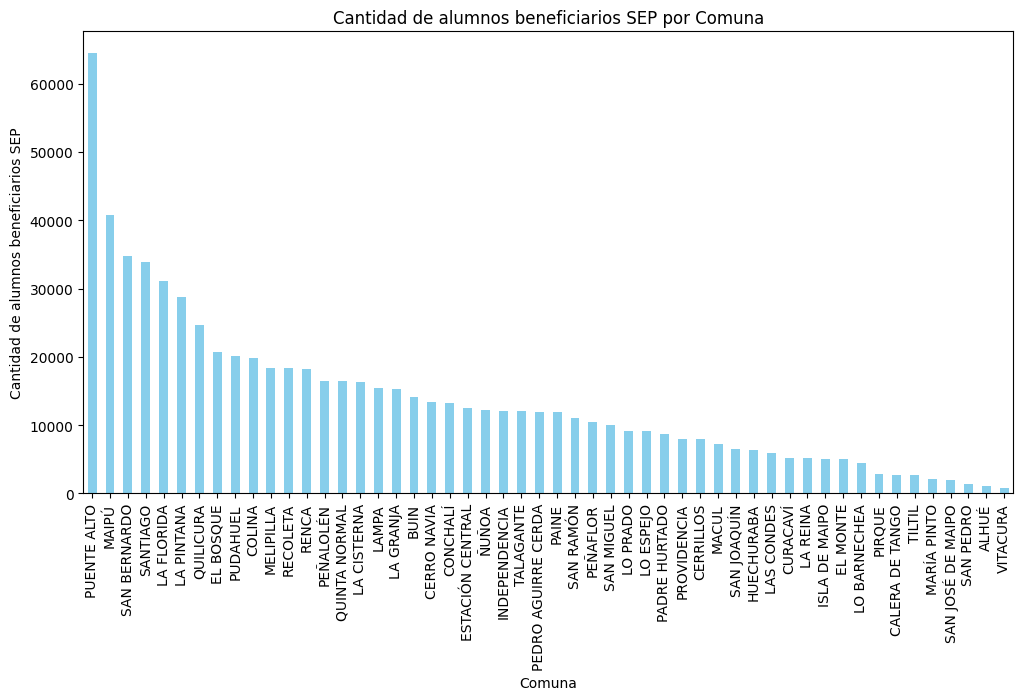

In [22]:
SEP_por_comuna = df_preferencias[df_preferencias["BEN_SEP"]==1].groupby("NOM_COM_RBD").size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
SEP_por_comuna.plot(kind='bar', color='skyblue')

plt.title('Cantidad de alumnos beneficiarios SEP por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de alumnos beneficiarios SEP')

plt.show()